In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
df_train = pd.read_csv('./processed_data/df_train.csv')
X_train = df_train.drop('label', axis=1)
y_train = df_train['label']

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)
# transform training data
X_train_norm = norm.transform(X_train)
X_train_norm

array([[0.        , 0.        , 0.00014859, ..., 0.        , 0.        ,
        0.        ],
       [0.00688817, 0.00031088, 0.00089153, ..., 0.        , 0.        ,
        0.        ],
       [0.00081037, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00688817, 0.        , 0.00014859, ..., 0.        , 0.        ,
        0.        ],
       [0.00162075, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00121556, 0.00145078, 0.00208024, ..., 0.        , 0.        ,
        0.        ]])

In [3]:
df_valid = pd.read_csv('./processed_data/df_valid.csv')
X_valid = df_valid.drop('label', axis=1)
y_valid = df_valid['label']

# transform validation data
X_valid_norm = norm.transform(X_valid)
X_valid_norm

array([[0.00081037, 0.00010363, 0.00014859, ..., 0.        , 0.        ,
        0.        ],
       [0.00648298, 0.00124352, 0.00237741, ..., 0.        , 0.        ,
        0.        ],
       [0.00162075, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00121556, 0.00010363, 0.00014859, ..., 0.        , 0.        ,
        0.        ],
       [0.00202593, 0.00031088, 0.00074294, ..., 0.        , 0.        ,
        0.        ],
       [0.00121556, 0.00010363, 0.00222883, ..., 0.        , 0.        ,
        0.        ]])

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import VotingClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=8)
kn_clf = KNeighborsClassifier(n_neighbors=15)

voting_clf = VotingClassifier(
    estimators=[('rf', rnd_clf), ('dt', dt_clf), ('kn', kn_clf)],
    voting='hard')

In [5]:
# validating
from sklearn.metrics import accuracy_score
for clf in (rnd_clf, dt_clf, kn_clf, voting_clf):
    clf.fit(X_train_norm, y_train)
    y_pred = clf.predict(X_valid_norm)
    print(clf.__class__.__name__, accuracy_score(y_valid, y_pred))

RandomForestClassifier 0.9735714285714285
DecisionTreeClassifier 0.9725
KNeighborsClassifier 0.9596428571428571
VotingClassifier 0.9832142857142857


In [6]:
df_test = pd.read_csv('./processed_data/df_test.csv')
X_test = df_test.drop('label', axis=1)
y_test = df_test['label']

# transform testing data
X_test_norm = norm.transform(X_test)
X_test_norm

array([[0.0028363 , 0.00020725, 0.00014859, ..., 0.        , 0.        ,
        0.        ],
       [0.01701783, 0.00093264, 0.00282318, ..., 0.        , 0.        ,
        0.        ],
       [0.00121556, 0.00134715, 0.00193165, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.00081037, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00972447, 0.00435233, 0.00445765, ..., 0.        , 0.        ,
        0.        ],
       [0.00324149, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [7]:
# testing
for clf in (rnd_clf, dt_clf, kn_clf, voting_clf):
    clf.fit(X_train_norm, y_train)
    y_pred = clf.predict(X_test_norm)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

RandomForestClassifier 0.97
DecisionTreeClassifier 0.9710714285714286
KNeighborsClassifier 0.9635714285714285
VotingClassifier 0.9825


In [8]:
# visualisation of results
from sklearn.metrics import confusion_matrix
y_pred = voting_clf.predict(X_test_norm)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[390  10   0   1   0   1   0]
 [ 12 378   0   0   0   0   0]
 [  0   0 399   0   0   4   0]
 [  0   0   0 427   0   0   0]
 [  0   1   3   0 383   2   0]
 [  0   1   6   0   1 395   0]
 [  0   2   0   1   0   4 379]]


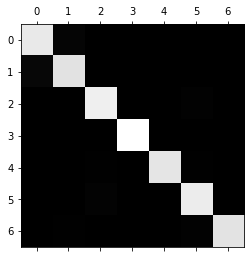

In [9]:
import matplotlib.pyplot as plt
plt.matshow(confusion_matrix, cmap=plt.cm.gray)
plt.show()

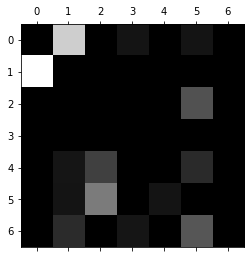

In [10]:
row_sums = confusion_matrix.sum(axis=1, keepdims=True)
norm_conf_mx = confusion_matrix / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

# rows represent actual classes
# columns represent predicted classes
plt.show()